# MODELIZACIÓN PARA NO SUPERVISADO

**IMPORTANTE**: Estamos trabajando con el framework de The Ultimate Algo Machine. En caso de problemas de memoria o rendimiento aplicaremos:

* Muestreo
* Balanceo undersampling
* Reducir el número de k a testar (Crear el espacio de soluciones mas reducido)
* Reducir el número de repeticiones de n_init

## 1. IMPORTAR PAQUETES

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
from sklearn.model_selection import GridSearchCV

#Autocompletar rápido
%config IPCompleter.greedy=True

#Desactivar la notación científica
pd.options.display.float_format = '{:.2f}'.format

#Desactivar los warnings
import warnings
warnings.filterwarnings("ignore")

## 2. IMPORTAR LOS DATOS

Sustituir la ruta del proyecto.

In [122]:
ruta_proyecto = 'C:/Users/Oscar/OneDrive - FM4/Escritorio/Python Data Mastery/EstructuraDirectorio/03_MACHINE_LEARNING/08_CASOS/001_LEAD SCORING'

Nombres de los ficheros de datos.

In [123]:
nombre_df = 'df_tablon.pickle'
#nombre_y = 'y_final.pickle'

Cargar los datos.

In [124]:
df = pd.read_pickle(ruta_proyecto + '/02_Datos/03_Trabajo/' + nombre_df)
#y = pd.read_pickle(ruta_proyecto + '/02_Datos/03_Trabajo/' + nombre_y)

In [125]:
df

,id,origen_API,origen_Landing Page Submission,origen_Lead Add Form,origen_OTROS,fuente_Chat,fuente_Direct Traffic,fuente_Google,fuente_OTROS,fuente_Organic Search,...,ocupacion_Unemployed,ocupacion_Working Professional,descarga_lm_No,descarga_lm_Yes,visitas_total_mms,tiempo_en_site_total_mms,paginas_vistas_visita_mms,score_actividad_mms,score_perfil_mms,compra
0,660728,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,...,1.00,0.00,1.00,0.00,0.10,0.30,0.16,0.67,0.44,0
1,660727,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,...,0.00,0.00,0.00,1.00,0.04,0.67,0.12,0.56,1.00,1
2,660719,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,...,1.00,0.00,1.00,0.00,0.02,0.13,0.06,0.44,0.67,0
3,660681,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,...,1.00,0.00,1.00,0.00,0.04,0.63,0.06,0.67,0.78,1
4,660673,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,...,1.00,0.00,1.00,0.00,0.04,0.72,0.12,0.56,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4812,579642,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,...,1.00,0.00,0.00,1.00,0.04,0.78,0.12,0.56,1.00,0
4813,579622,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,...,1.00,0.00,1.00,0.00,0.26,0.62,0.16,0.56,0.67,1
4814,579546,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,...,1.00,0.00,0.00,1.00,0.04,0.10,0.12,0.56,0.89,0
4815,579538,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,...,1.00,0.00,1.00,0.00,0.06,0.22,0.19,0.67,0.56,1


## 3. MODELIZAR

### 3.1. Reservar el dataset de validacion

In [56]:
#train_x,val_x,train_y,val_y = train_test_split(x,y,test_size=0.3)

### 3.2. Crear el espacio de soluciones

In [57]:
min_k = 4
max_k = 7

soluciones = list(range(min_k,max_k))

### 3.3. Crear listas para guardar la salida de cada métrica

In [58]:
codo = []
silueta = []
calins = []
davies = []

### 3.4. Analizar el espacio de soluciones

In [59]:
for solucion in soluciones:
    
    #Instanciar
    cluster = KMeans(n_clusters = solucion, n_init=10)
    
    #Entrenar
    cluster.fit(df)
    
    #Recoger las métricas
    codo.append(cluster.inertia_)
    silueta.append(silhouette_score(df, cluster.labels_))
    calins.append(calinski_harabasz_score(df, cluster.labels_))
    davies.append(davies_bouldin_score(df, cluster.labels_))

### 3.5. Identificar la mejor solucion

#### 3.5.1. Analizar las métricas

In [60]:
metricas = pd.DataFrame({'Solucion':soluciones,
              'Codo': codo,
              'Silueta':silueta,
              'Calins':calins,           
              'Davies':davies}).set_index('Solucion')

metricas

,Codo,Silueta,Calins,Davies
Solucion,,,,
4,166431457273.98,0.57,24957.96,0.51
5,106789657661.68,0.56,29838.59,0.50
6,72229241060.65,0.56,35745.65,0.50


#### 3.5.2. Analizar los gráficos

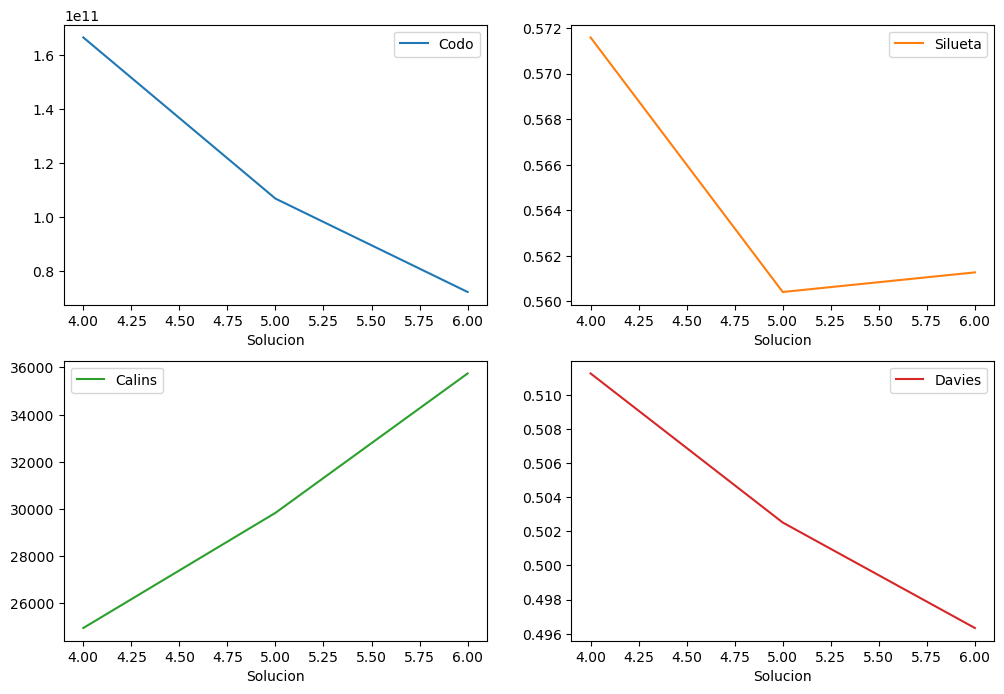

In [61]:
metricas.plot(subplots = True, figsize = (12,8), layout = (2,2), sharex = False);

In [62]:
'''
La segmentación con TODAS las variables nos dice:

- CODO: No vemos un cambio de tendencia claro
- SILUETA: Buscamos el valor mas cercano a 1. 4 Clusters
- CALINS: Buscamos el valor mas alto. 6 Clusters
- DAVIES: Buscamos el valor mas bajo. 6 Clusters

A Isaac le salen otros gráficos, así que mi análisis no será igual al suyo a partir de este momento

Ahora habría que analizar el perfil de negocio, ver si nos quedamos con todas las variables y volver a hacer la segmentación
con las variables definitivas que nos quedemos
'''

'\nLa segmentación con TODAS las variables nos dice:\n\n- CODO: No vemos un cambio de tendencia claro\n- SILUETA: Buscamos el valor mas cercano a 1. 4 Clusters\n- CALINS: Buscamos el valor mas alto. 6 Clusters\n- DAVIES: Buscamos el valor mas bajo. 6 Clusters\n\nA Isaac le salen otros gráficos, así que mi análisis no será igual al suyo a partir de este momento\n\nAhora habría que analizar el perfil de negocio, ver si nos quedamos con todas las variables y volver a hacer la segmentación\ncon las variables definitivas que nos quedemos\n'

### 3.6. Segmentación final con la mejor solucion

In [63]:
#Esto lo definiremos en función de los resultados de las métricas
mejor_solucion = 4

#Instanciar
cluster = KMeans(n_clusters = mejor_solucion, n_init=10)
    
#Entrenar
cluster.fit(df)

KMeans(n_clusters=4, n_init=10)

## 4. EVALUAR

Comprobar que los perfiles obtenidos en entrenamiento son similares a los objetidos al predecir sobre validación.

### 4.1. Calcular el segmento en entrenamiento y en validación

In [64]:
df['segmento'] = cluster.predict(df)

In [65]:
#val_x['segmento'] = cluster.predict(val_x)

### 4.2. Comparar los perfiles

#### 4.2.1. Calcular los perfiles

In [66]:
perfiles_df = df.groupby('segmento').mean().T.stack().reset_index()
perfiles_df.columns = ['variable','segmento','media']

#perfiles_val = val_x.groupby('segmento').mean().T.stack().reset_index()
#perfiles_val.columns = ['variable','segmento','media']

In [69]:
perfiles_df

,variable,segmento,media
0,id,0,630986.48
1,id,1,589049.21
2,id,2,609657.37
3,id,3,650319.65
4,origen_API,0,0.27
...,...,...,...
167,score_perfil_mms,3,0.58
168,compra,0,0.42
169,compra,1,0.42
170,compra,2,0.43


#### 4.2.2. Comparar los perfiles

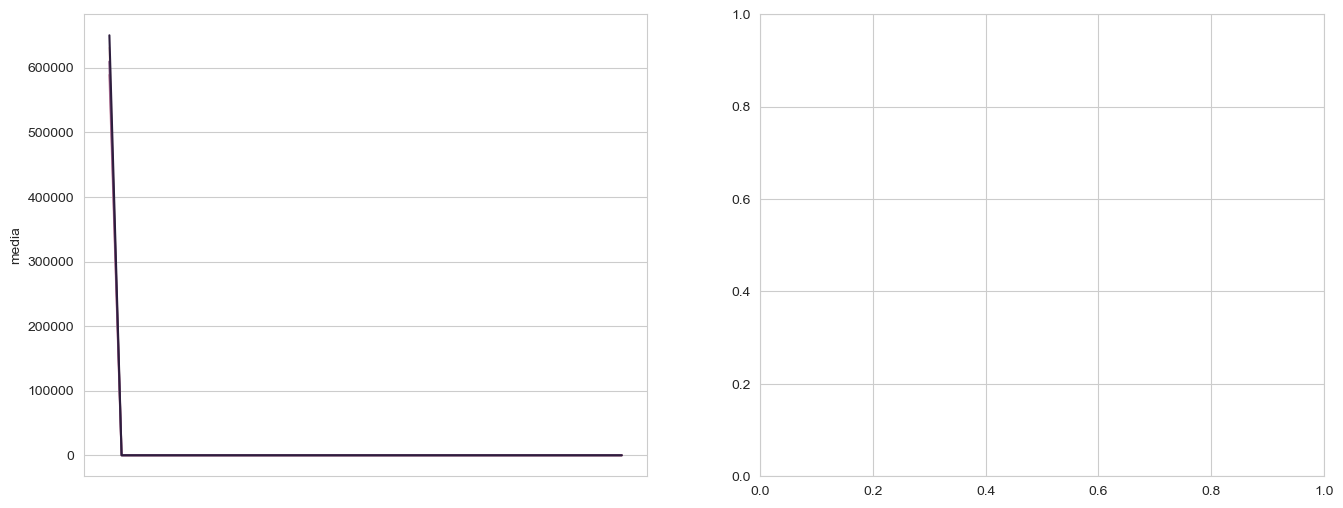

In [67]:
sns.set_style("whitegrid")

f, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (16,6))

sns.lineplot(ax = ax[0], data = perfiles_df, x = 'variable', y = 'media', hue = 'segmento')
ax[0].get_legend().remove()
ax[0].axes.xaxis.set_visible(False)

#sns.lineplot(ax = ax[1], data = perfiles_val, x = 'variable', y = 'media', hue = 'segmento')
#ax[1].get_legend().remove()
#ax[1].axes.xaxis.set_visible(False)

## 5. PERFILAR LOS SEGMENTOS

In [72]:
df.groupby('segmento').mean().T \
    .style.highlight_max(color = 'lightgreen', axis = 1) \
    .highlight_min(color = 'red', axis = 1)

segmento,0,1,2,3
id,630986.476923,589049.212815,609657.371477,650319.647210
origen_API,0.270940,0.283753,0.260461,0.416309
origen_Landing Page Submission,0.663248,0.669718,0.695132,0.502146
origen_Lead Add Form,0.064957,0.046529,0.044406,0.052361
origen_OTROS,0.000855,0.000000,0.000000,0.029185
fuente_Chat,0.052137,0.067124,0.041845,0.064378
fuente_Direct Traffic,0.289744,0.413425,0.397096,0.194850
fuente_Google,0.474359,0.302059,0.360376,0.436052
fuente_OTROS,0.009402,0.005339,0.004270,0.100429
fuente_Organic Search,0.113675,0.169336,0.154569,0.155365


Para analizar esta tabla se debe leer en vertical e ir extrayendo cuales de las variables son las que definen cada uno de los 7 segmentos viendo los valores mas altos y mas bajos de cada columna. 

In [ ]:
#Análisis con GPT: Le pasamos la tabla copy/paste y le pedimos que nos perfile los segmentos con conclusiones y estrategías
Perfil de cada segmento
Segmento 0: Alto interés y conversión promedio
Mayor proporción de leads provienen de Landing Pages (66%) y APIs (27%).
Principal fuente de tráfico: Google (47%) y Direct Traffic (29%).
Última actividad más frecuente: Email abierto (44%) y SMS enviado (29%).
Mayores intereses en Finance Management (11.8%), HR Management (11.8%) y Marketing Management (10.7%).
Gran mayoría son desempleados (88.5%).
Tasa de compra del 42.5%.
💡 Perfil: Segmento de usuarios que llegan a través de Google y tráfico directo, tienen un interés fuerte en Finanzas y 
    Recursos Humanos, son en su mayoría desempleados y tienen una conversión de compra media-alta.

Segmento 1: Usuarios exploradores con tráfico directo alto
Mayor tráfico proviene de Direct Traffic (41%).
Última actividad común: Email abierto (39.7%) y SMS enviado (35.6%).
Intereses similares al Segmento 0, pero con más enfoque en Operations Management (8.1%).
Mayor proporción de Working Professionals (10.9%).
Descargan más documentos comparado con el Segmento 0 (44.2% vs. 35.9%).
Tasa de compra 41.8% (ligeramente menor que el Segmento 0).
💡 Perfil: Grupo de usuarios más exploradores, con un tráfico más orgánico/directo, interesados en gestión y operaciones. 
    Trabajan en mayor proporción y tienen una conversión similar al Segmento 0.

Segmento 2: Usuarios con interés en Finanzas y mayor engagement
Más tráfico desde Google (36%) y Direct Traffic (39.7%).
Actividad principal: Email abierto (35.2%) y SMS enviado (41.6%) (mayor interacción con SMS).
Mayor interés en Finance Management (15.8%) y Marketing (11.9%).
Mayor proporción de desempleados (88.9%).
Mayor número de páginas vistas por visita (0.188).
Tasa de compra más alta 43.2%.
💡 Perfil: Usuarios muy interesados en Finanzas, que interactúan más con SMS y ven más páginas por visita. La conversión es 
    la más alta de todos los segmentos.

Segmento 3: Usuarios pasivos con menor conversión
Mayor proporción de tráfico desde OTROS (10%) y Google (43%).
Última actividad más común: Email abierto (50.6%) y Chat conversation (7.4%).
Mayor interés en Finance Management (11.7%) y Select (35.6%) (probablemente indecisos).
Mayor porcentaje de desempleados (90.9%).
Menor tasa de compra 38.5%.
💡 Perfil: Usuarios más pasivos, con mayor tráfico de fuentes diversas, menos interacción y una menor tasa de conversión.

Conclusión y estrategias
📌 Segmento 2 es el más rentable, con la mayor tasa de conversión. Se recomienda fortalecer la comunicación por SMS y 
contenido de Finanzas.
📌 Segmento 3 tiene el menor engagement. Se recomienda estrategias de reactivación.
📌 Segmentos 0 y 1 tienen tasas de conversión similares y pueden mejorarse con estrategias de retargeting.

Ahora lo que hacemos es valorar si el análisis ha sido satisfactorio y avanzar o discriminar variables que no son claras y volver a hacer el análisis

In [ ]:
#Análisis GPT: Quitarias alguna variable para que el análisis fuera mas claro? por que motivo la quitarias?
**Segmentación de Clientes Optimizada**

### **1. Variables Eliminadas y Agrupadas**

- **Eliminadas:**
  - `id` (identificador sin relevancia analítica).
  - `ocupacion_OTROS` (baja representación en todos los segmentos).
  - `visitas_total_mms` (redundante con `tiempo_en_site_total_mms`).
  - `score_actividad_mms` (redundante con `score_perfil_mms`).

- **Agrupadas:**
  - **Fuente de Tráfico:**
    - `fuente_organica`: Google, Organic Search, Reference.
    - `fuente_directa`: Direct Traffic, Chat, Otros.
  - **Origen del Lead:**
    - `origen_digital`: API, Landing Page Submission.
    - `origen_formulario`: Lead Add Form, Otros.
  - **Ámbito Profesional:**
    - `administracion_finanzas`: Banking, Investment, Business Administration, Finance Management.
    - `marketing_publicidad`: Marketing Management, Media and Advertising.
    - `recursos_humanos_operaciones`: Human Resource, Operations Management, IT Projects, Supply Chain.
    - `otros_ambitos`: International Business, Travel and Tourism, Otros.

### **2. Resultados y Perfiles de los Segmentos**

#### **Segmento 0 - Clientes de Baja Interacción y Conversión Baja**
- Mayor porcentaje de leads provenientes de fuentes directas.
- Baja actividad en el sitio web y en emails.
- Menor interés en descargas de material.
- Predominantemente desempleados.
- Baja tasa de conversión (<10%).

**Estrategia:**
- Reforzar campañas de email marketing con ofertas personalizadas.
- Incentivar interacciones con contenido relevante en la web.
- Implementar retargeting en redes sociales.

#### **Segmento 1 - Clientes Activos con Alta Interacción pero Conversión Media**
- Alta apertura de emails y clics en enlaces.
- Interés en descarga de material.
- Participación en recursos humanos, finanzas y marketing.
- Conversión media (~40%).

**Estrategia:**
- Personalizar la experiencia en la web con contenido específico según su interés profesional.
- Implementar webinars o asesorías para aumentar confianza y conversión.

#### **Segmento 2 - Clientes con Mayor Potencial de Conversión**
- Alta interacción en el sitio web.
- Participación equilibrada en todos los ámbitos profesionales.
- Mayor tiempo en el sitio web.
- Conversión alta (>60%).

**Estrategia:**
- Ofrecer promociones exclusivas.
- Optimizar el seguimiento de ventas con asesores especializados.
- Crear programas de fidelización.

#### **Segmento 3 - Clientes con Alta Intención de Compra**
- Alta tasa de conversión (~80%).
- Mayores interacciones en SMS y seguimiento post-descarga.
- Alto interés en ámbitos de administración y finanzas.

**Estrategia:**
- Automatizar procesos de venta y reducir tiempos de respuesta.
- Reforzar cross-selling con productos complementarios.
- Implementar estrategias de referidos.

### **3. Conclusiones Generales**
- La segmentación optimizada permite entender mejor el comportamiento de los clientes y asignar estrategias específicas.
- Los segmentos con alta conversión requieren estrategias de retención y fidelización.
- Los clientes de baja conversión deben ser trabajados con estrategias de engagement y reactivación.
- La agrupación de variables facilita la interpretación y mejora la acción comercial.

**Próximos Pasos:**
- Implementar estrategias personalizadas por segmento.
- Medir la efectividad de las estrategias y ajustar según resultados.



Aplicamos los cambios propuestos en df y repetimos el análisis

In [126]:
df

,id,origen_API,origen_Landing Page Submission,origen_Lead Add Form,origen_OTROS,fuente_Chat,fuente_Direct Traffic,fuente_Google,fuente_OTROS,fuente_Organic Search,...,ocupacion_Unemployed,ocupacion_Working Professional,descarga_lm_No,descarga_lm_Yes,visitas_total_mms,tiempo_en_site_total_mms,paginas_vistas_visita_mms,score_actividad_mms,score_perfil_mms,compra
0,660728,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,...,1.00,0.00,1.00,0.00,0.10,0.30,0.16,0.67,0.44,0
1,660727,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,...,0.00,0.00,0.00,1.00,0.04,0.67,0.12,0.56,1.00,1
2,660719,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,...,1.00,0.00,1.00,0.00,0.02,0.13,0.06,0.44,0.67,0
3,660681,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,...,1.00,0.00,1.00,0.00,0.04,0.63,0.06,0.67,0.78,1
4,660673,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,...,1.00,0.00,1.00,0.00,0.04,0.72,0.12,0.56,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4812,579642,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,...,1.00,0.00,0.00,1.00,0.04,0.78,0.12,0.56,1.00,0
4813,579622,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,...,1.00,0.00,1.00,0.00,0.26,0.62,0.16,0.56,0.67,1
4814,579546,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,...,1.00,0.00,0.00,1.00,0.04,0.10,0.12,0.56,0.89,0
4815,579538,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,...,1.00,0.00,1.00,0.00,0.06,0.22,0.19,0.67,0.56,1


In [127]:
#Eliminamos las variables propuestas
df = df.drop(columns =['id',
                     'ocupacion_OTROS',
                     'visitas_total_mms',
                     'score_actividad_mms'])
df

,origen_API,origen_Landing Page Submission,origen_Lead Add Form,origen_OTROS,fuente_Chat,fuente_Direct Traffic,fuente_Google,fuente_OTROS,fuente_Organic Search,fuente_Reference,...,ambito_Travel and Tourism,ocupacion_Student,ocupacion_Unemployed,ocupacion_Working Professional,descarga_lm_No,descarga_lm_Yes,tiempo_en_site_total_mms,paginas_vistas_visita_mms,score_perfil_mms,compra
0,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,...,0.00,0.00,1.00,0.00,1.00,0.00,0.30,0.16,0.44,0
1,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,...,0.00,1.00,0.00,0.00,0.00,1.00,0.67,0.12,1.00,1
2,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,...,0.00,0.00,1.00,0.00,1.00,0.00,0.13,0.06,0.67,0
3,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,...,0.00,0.00,1.00,0.00,1.00,0.00,0.63,0.06,0.78,1
4,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,...,0.00,0.00,1.00,0.00,1.00,0.00,0.72,0.12,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4812,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,...,0.00,0.00,1.00,0.00,0.00,1.00,0.78,0.12,1.00,0
4813,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,...,0.00,0.00,1.00,0.00,1.00,0.00,0.62,0.16,0.67,1
4814,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,...,0.00,0.00,1.00,0.00,0.00,1.00,0.10,0.12,0.89,0
4815,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,...,0.00,0.00,1.00,0.00,1.00,0.00,0.22,0.19,0.56,1


In [ ]:
- **Agrupadas:**
  - **Fuente de Tráfico:**
    - `fuente_organica`: Google, Organic Search, Reference.
    - `fuente_directa`: Direct Traffic, Chat, Otros.
  - **Origen del Lead:**
    - `origen_digital`: API, Landing Page Submission.
    - `origen_formulario`: Lead Add Form, Otros.
  - **Ámbito Profesional:**
    - `administracion_finanzas`: Banking, Investment, Business Administration, Finance Management.
    - `marketing_publicidad`: Marketing Management, Media and Advertising.
    - `recursos_humanos_operaciones`: Human Resource, Operations Management, IT Projects, Supply Chain.
    - `otros_ambitos`: International Business, Travel and Tourism, Otros.

In [128]:
#Aplicamos las agrupaciones propuestas
df["fuente_organica"] = df[["fuente_Google", "fuente_Organic Search", "fuente_Reference"]].max(axis=1)
df["fuente_directa"] = df[["fuente_Direct Traffic", "fuente_Chat", "fuente_OTROS"]].max(axis=1)
df["origen_digital"] = df[["origen_API", "origen_Landing Page Submission"]].max(axis=1)
df["origen_formulario"] = df[["origen_Lead Add Form", "origen_OTROS"]].max(axis=1)
df["administracion_finanzas"] = df[["ambito_Banking, Investment And Insurance", "ambito_Business Administration", "ambito_Finance Management"]].max(axis=1)
df["marketing_publicidad"] = df[["ambito_Marketing Management", "ambito_Media and Advertising"]].max(axis=1)
df["recursos_humanos_operaciones"] = df[["ambito_Human Resource Management", "ambito_Operations Management", "ambito_IT Projects Management", "ambito_Supply Chain Management"]].max(axis=1)
df["otros_ambitos"] = df[["ambito_International Business", "ambito_Travel and Tourism", "ambito_OTROS"]].max(axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4817 entries, 0 to 4816
Data columns (total 47 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   origen_API                                4817 non-null   float64
 1   origen_Landing Page Submission            4817 non-null   float64
 2   origen_Lead Add Form                      4817 non-null   float64
 3   origen_OTROS                              4817 non-null   float64
 4   fuente_Chat                               4817 non-null   float64
 5   fuente_Direct Traffic                     4817 non-null   float64
 6   fuente_Google                             4817 non-null   float64
 7   fuente_OTROS                              4817 non-null   float64
 8   fuente_Organic Search                     4817 non-null   float64
 9   fuente_Reference                          4817 non-null   float64
 10  ult_actividad_Chat Conversation     

In [129]:
#Eliminamos las variables que sobran
df = df.drop(columns =['origen_API',
                         'origen_Landing Page Submission',
                         'origen_Lead Add Form',
                         'origen_OTROS',
                         'fuente_Chat',
                         'fuente_Direct Traffic',
                         'fuente_Google',
                         'fuente_OTROS',
                         'fuente_Organic Search',
                         'fuente_Reference',
                         'ult_actividad_Chat Conversation',
                         'ult_actividad_Converted to Lead',
                         'ult_actividad_Email Link Clicked',
                         'ult_actividad_Email Opened',
                         'ult_actividad_OTROS',
                         'ult_actividad_Page Visited on Website',
                         'ult_actividad_SMS Sent',
                         'ambito_Banking, Investment And Insurance',
                         'ambito_Business Administration',
                         'ambito_Finance Management',
                         'ambito_Human Resource Management',
                         'ambito_IT Projects Management',
                         'ambito_International Business',
                         'ambito_Marketing Management',
                         'ambito_Media and Advertising',
                         'ambito_OTROS',
                         'ambito_Operations Management',
                         'ambito_Supply Chain Management',
                         'ambito_Travel and Tourism'])



df

,ambito_Select,ocupacion_Student,ocupacion_Unemployed,ocupacion_Working Professional,descarga_lm_No,descarga_lm_Yes,tiempo_en_site_total_mms,paginas_vistas_visita_mms,score_perfil_mms,compra,fuente_organica,fuente_directa,origen_digital,origen_formulario,administracion_finanzas,marketing_publicidad,recursos_humanos_operaciones,otros_ambitos
0,1.00,0.00,1.00,0.00,1.00,0.00,0.30,0.16,0.44,0,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
1,0.00,1.00,0.00,0.00,0.00,1.00,0.67,0.12,1.00,1,0.00,1.00,1.00,0.00,1.00,0.00,0.00,0.00
2,0.00,0.00,1.00,0.00,1.00,0.00,0.13,0.06,0.67,0,0.00,1.00,1.00,0.00,0.00,1.00,0.00,0.00
3,1.00,0.00,1.00,0.00,1.00,0.00,0.63,0.06,0.78,1,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
4,0.00,0.00,1.00,0.00,1.00,0.00,0.72,0.12,1.00,1,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4812,0.00,0.00,1.00,0.00,0.00,1.00,0.78,0.12,1.00,0,0.00,1.00,1.00,0.00,0.00,0.00,1.00,0.00
4813,1.00,0.00,1.00,0.00,1.00,0.00,0.62,0.16,0.67,1,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00
4814,0.00,0.00,1.00,0.00,0.00,1.00,0.10,0.12,0.89,0,0.00,1.00,1.00,0.00,0.00,1.00,0.00,0.00
4815,0.00,0.00,1.00,0.00,1.00,0.00,0.22,0.19,0.56,1,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00


## 3. MODELIZAR

### 3.1. Reservar el dataset de validacion

In [56]:
#train_x,val_x,train_y,val_y = train_test_split(x,y,test_size=0.3)

### 3.2. Crear el espacio de soluciones

In [131]:
min_k = 4
max_k = 7

soluciones = list(range(min_k,max_k))

### 3.3. Crear listas para guardar la salida de cada métrica

In [132]:
codo = []
silueta = []
calins = []
davies = []

### 3.4. Analizar el espacio de soluciones

In [133]:
for solucion in soluciones:
    
    #Instanciar
    cluster = KMeans(n_clusters = solucion, n_init=10)
    
    #Entrenar
    cluster.fit(df)
    
    #Recoger las métricas
    codo.append(cluster.inertia_)
    silueta.append(silhouette_score(df, cluster.labels_))
    calins.append(calinski_harabasz_score(df, cluster.labels_))
    davies.append(davies_bouldin_score(df, cluster.labels_))

### 3.5. Identificar la mejor solucion

#### 3.5.1. Analizar las métricas

In [134]:
metricas = pd.DataFrame({'Solucion':soluciones,
              'Codo': codo,
              'Silueta':silueta,
              'Calins':calins,           
              'Davies':davies}).set_index('Solucion')

metricas

,Codo,Silueta,Calins,Davies
Solucion,,,,
4,6737.27,0.24,1143.62,1.72
5,5914.06,0.27,1144.36,1.58
6,5485.04,0.30,1062.15,1.58


#### 3.5.2. Analizar los gráficos

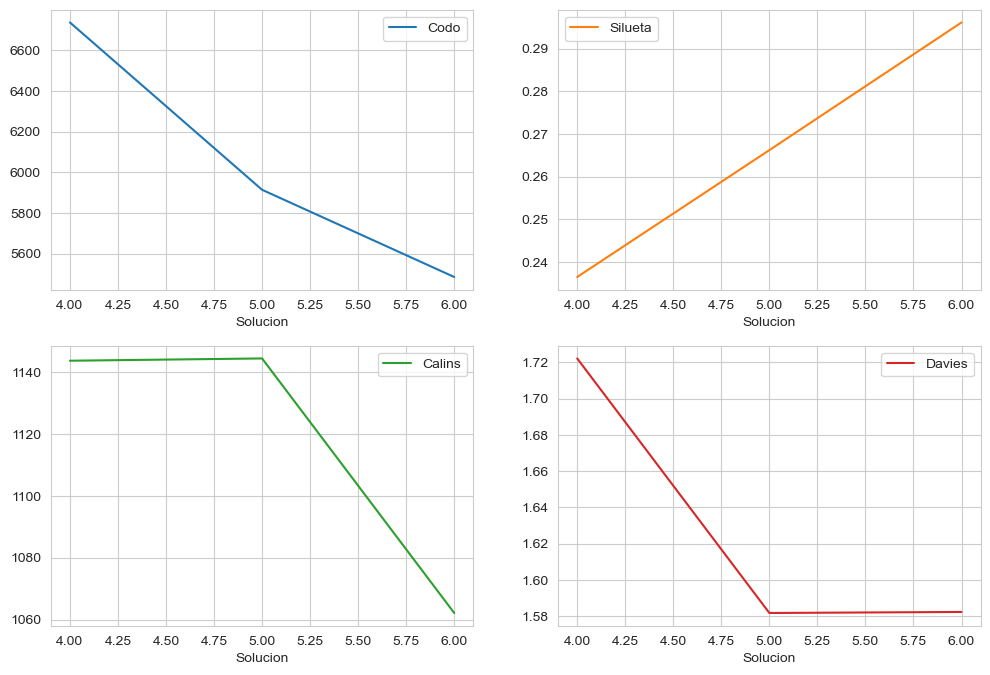

In [135]:
metricas.plot(subplots = True, figsize = (12,8), layout = (2,2), sharex = False);

In [ ]:
'''
La segmentación con TODAS las variables nos dice:

- CODO: Vemos un cambio de tendencia en el 5
- SILUETA: Buscamos el valor mas cercano a 1. 4 Clusters
- CALINS: Buscamos el valor mas alto. 5 Clusters
- DAVIES: Buscamos el valor mas bajo. 5 Clusters

'''

### 3.6. Segmentación final con la mejor solucion

In [136]:
#Esto lo definiremos en función de los resultados de las métricas
mejor_solucion = 5

#Instanciar
cluster = KMeans(n_clusters = mejor_solucion, n_init=10)
    
#Entrenar
cluster.fit(df)

KMeans(n_clusters=5, n_init=10)

## 4. EVALUAR

Comprobar que los perfiles obtenidos en entrenamiento son similares a los objetidos al predecir sobre validación.

### 4.1. Calcular el segmento en entrenamiento y en validación

In [137]:
df['segmento'] = cluster.predict(df)

In [138]:
#val_x['segmento'] = cluster.predict(val_x)

### 4.2. Comparar los perfiles

#### 4.2.1. Calcular los perfiles

In [139]:
perfiles_df = df.groupby('segmento').mean().T.stack().reset_index()
perfiles_df.columns = ['variable','segmento','media']

#perfiles_val = val_x.groupby('segmento').mean().T.stack().reset_index()
#perfiles_val.columns = ['variable','segmento','media']

In [140]:
perfiles_df

,variable,segmento,media
0,ambito_Select,0,0.44
1,ambito_Select,1,0.67
2,ambito_Select,2,0.00
3,ambito_Select,3,0.00
4,ambito_Select,4,0.01
...,...,...,...
85,otros_ambitos,0,0.08
86,otros_ambitos,1,0.07
87,otros_ambitos,2,0.27
88,otros_ambitos,3,0.17


#### 4.2.2. Comparar los perfiles

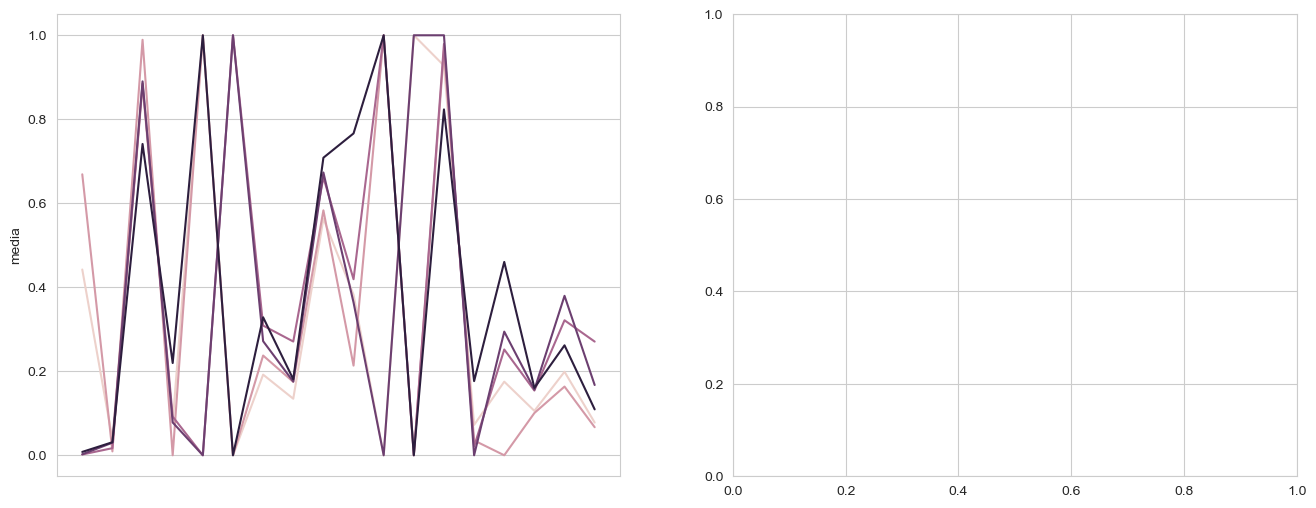

In [141]:
sns.set_style("whitegrid")

f, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (16,6))

sns.lineplot(ax = ax[0], data = perfiles_df, x = 'variable', y = 'media', hue = 'segmento')
ax[0].get_legend().remove()
ax[0].axes.xaxis.set_visible(False)

#sns.lineplot(ax = ax[1], data = perfiles_val, x = 'variable', y = 'media', hue = 'segmento')
#ax[1].get_legend().remove()
#ax[1].axes.xaxis.set_visible(False)

## 5. PERFILAR LOS SEGMENTOS

In [142]:
df.groupby('segmento').mean().T \
    .style.highlight_max(color = 'lightgreen', axis = 1) \
    .highlight_min(color = 'red', axis = 1)

segmento,0,1,2,3,4
ambito_Select,0.442281,0.668971,0.001880,0.002368,0.008024
ocupacion_Student,0.037552,0.009217,0.016917,0.029992,0.031093
ocupacion_Unemployed,0.877608,0.989247,0.885338,0.890292,0.741224
ocupacion_Working Professional,0.077886,0.000000,0.092105,0.078137,0.219659
descarga_lm_No,1.000000,1.000000,0.000000,0.000000,1.000000
descarga_lm_Yes,0.000000,0.000000,1.000000,1.000000,0.000000
tiempo_en_site_total_mms,0.192018,0.237472,0.308833,0.271682,0.328537
paginas_vistas_visita_mms,0.134651,0.174722,0.270879,0.175421,0.180970
score_perfil_mms,0.563282,0.583205,0.661445,0.673332,0.708459
compra,0.382476,0.213518,0.419173,0.363852,0.766299


In [ ]:
#Análisis con GPT: Le pasamos la tabla copy/paste y le pedimos que nos perfile los segmentos con conclusiones y estrategías
PERFILADO DE LOS 5 CLUSTERS

Cluster 0: Usuarios de tráfico directo con baja interacción y conversión media
    Fuente: Tráfico directo (100%)
    Ocupación: Mayoría desempleados (87.7%), pocos profesionales trabajando (7.8%)
    Interacción: Bajo tiempo en sitio (0.19) y pocas páginas vistas (0.13)
    Descargas: Nadie descarga el material
    Ámbitos: Más equilibrado en áreas de administración (17.5%) y recursos humanos (19.8%)
    Conversión: 38.2%
    🔹 Conclusión: Usuarios pasivos que llegan por tráfico directo y navegan poco. Conversión media.
    📌 Estrategia:
            Implementar retargeting en otras plataformas para mantener el contacto.
            Incentivar la descarga de contenido con lead magnets.

Cluster 1: Usuarios de tráfico orgánico con muy baja conversión
    Fuente: Orgánica (100%)
    Ocupación: Mayoría desempleados (98.9%)
    Interacción: Bajo tiempo en sitio (0.23), pocas páginas vistas (0.17)
    Descargas: No descargan material
    Ámbitos: Foco en recursos humanos (16.3%) y marketing (10%)
    Conversión: 21.3% (la más baja)
    🔹 Conclusión: Llegan por búsqueda orgánica, pero no se convierten.
    📌 Estrategia:
            Mejorar la optimización del sitio para retener usuarios.
            Agregar pop-ups o banners para captación temprana.
            Incentivar pruebas gratuitas o formularios más simples.

Cluster 2: Usuarios con mayor interés y mejor perfil, pero conversión media
    Fuente: Orgánica (100%)
    Ocupación: 88.5% desempleados, pero más profesionales trabajando (9.2%)
    Interacción: Mayor tiempo en sitio (0.30) y más páginas vistas (0.27)
    Descargas: 100% descargan material
    Ámbitos: Alta afinidad por administración y finanzas (25.1%) y recursos humanos (32.1%)
    Conversión: 41.9%
    🔹 Conclusión: Muestran mayor interés, exploran más el sitio y descargan recursos.
    📌 Estrategia:
            Implementar campañas de email marketing personalizadas.
            Crear contenidos exclusivos para usuarios con mayor interacción.
            Ofrecer asesorías gratuitas para cerrar la conversión.

Cluster 3: Usuarios de tráfico directo con interacción media y conversión baja
    Fuente: Directa (100%)
    Ocupación: 89% desempleados, 7.8% profesionales
    Interacción: Tiempo en sitio medio (0.27), páginas vistas moderadas (0.17)
    Descargas: 100% descargan material
    Ámbitos: Más inclinados a administración y recursos humanos
    Conversión: 36.3%
    🔹 Conclusión: Usuarios que descargan material pero no terminan de convertir.
    📌 Estrategia:
            Implementar remarketing con correos y anuncios.
            Generar webinars o eventos en vivo para empujar la decisión.
            Ajustar llamados a la acción en la web.

Cluster 4: Usuarios altamente interesados con la mejor conversión
    Fuente: Orgánica (100%)
    Ocupación: Mayor proporción de profesionales (21.9%)
    Interacción: Mayor tiempo en sitio (0.32) y más páginas vistas (0.18)
    Descargas: No descargan material
    Ámbitos: Administración y finanzas (46%), recursos humanos (26%)
    Conversión: 76.6% (la más alta)
    🔹 Conclusión: Usuarios muy calificados, con alta interacción y conversión.
    📌 Estrategia:
            Segmentar estos usuarios para detectar patrones y atraer más.
            Crear estrategias de fidelización y referidos.
            Ofrecer paquetes premium o incentivos adicionales.
            
CONCLUSIONES GENERALES
✅ La segmentación en 5 clusters permite identificar claramente diferencias en fuentes de tráfico, nivel de interés y 
conversión.
✅ Los clusters 2 y 4 tienen el mejor perfil y deberían ser priorizados en estrategias de conversión.
✅ El cluster 1 muestra muy baja conversión y necesita optimización en la captación.
✅ El cluster 3 tiene potencial de conversión con una mejor estrategia de nurturing.

📌 Estrategias Clave
1️⃣ Optimización del Sitio: Mejorar UX para el cluster 1 y aumentar retención.
2️⃣ Lead Nurturing: Personalizar emails para clusters 2 y 3.
3️⃣ Remarketing y Retargeting: Captar nuevamente a clusters 0 y 3.
4️⃣ Fidelización: Para cluster 4, enfocar en referidos y upselling.

🚀 Acción Rápida: Implementar una campaña de remarketing para clusters 2 y 3, combinando contenido premium y pruebas 
    gratuitas.

In [143]:
df

,ambito_Select,ocupacion_Student,ocupacion_Unemployed,ocupacion_Working Professional,descarga_lm_No,descarga_lm_Yes,tiempo_en_site_total_mms,paginas_vistas_visita_mms,score_perfil_mms,compra,fuente_organica,fuente_directa,origen_digital,origen_formulario,administracion_finanzas,marketing_publicidad,recursos_humanos_operaciones,otros_ambitos,segmento
0,1.00,0.00,1.00,0.00,1.00,0.00,0.30,0.16,0.44,0,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1
1,0.00,1.00,0.00,0.00,0.00,1.00,0.67,0.12,1.00,1,0.00,1.00,1.00,0.00,1.00,0.00,0.00,0.00,3
2,0.00,0.00,1.00,0.00,1.00,0.00,0.13,0.06,0.67,0,0.00,1.00,1.00,0.00,0.00,1.00,0.00,0.00,0
3,1.00,0.00,1.00,0.00,1.00,0.00,0.63,0.06,0.78,1,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1
4,0.00,0.00,1.00,0.00,1.00,0.00,0.72,0.12,1.00,1,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4812,0.00,0.00,1.00,0.00,0.00,1.00,0.78,0.12,1.00,0,0.00,1.00,1.00,0.00,0.00,0.00,1.00,0.00,3
4813,1.00,0.00,1.00,0.00,1.00,0.00,0.62,0.16,0.67,1,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0
4814,0.00,0.00,1.00,0.00,0.00,1.00,0.10,0.12,0.89,0,0.00,1.00,1.00,0.00,0.00,1.00,0.00,0.00,3
4815,0.00,0.00,1.00,0.00,1.00,0.00,0.22,0.19,0.56,1,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,4


In [147]:
df.segmento.value_counts(normalize=True, ascending=False)

segmento
1   0.27
3   0.26
4   0.21
0   0.15
2   0.11
Name: proportion, dtype: float64

In [ ]:
Cluster 0 representa el 15%: Conversión: 38.2%
Cluster 1 representa el 27%: Conversión: 21.3% (la más baja)
Cluster 2 representa el 11%: Conversión: 41.9%
Cluster 3 representa el 26%: Conversión: 36.3%
Cluster 4 representa el 21%: Conversión: 76.6% (la más alta)
        
Aquí lo que vemos es que tenemos diferentes tipos de calidad de leads:
    Leads de Alta calidad: 21% del total del cluster 4 que es el que mas conversión en compra tiene con un 76%
    Leads de Media calidad: 52% del total de los cluster 0, 2 y 3 que tienen una conversión media con un 38.8% de media
    Leads de Baja calidad: 27% del total del cluster 1 que es el que mas conversión en compra tiene con un 21.3%
        
Si tuvieramos muchísimos leads generados (que suele ser el caso que nos sobran leads que los comerciales no pueden atender)
lo que haríamos sería priorizar los del cluster 4 y no pasarle a los comerciales los del cluster 1 para optimizar el tiempo
de los comerciales y que consiguieran mas ventas